# Analisando dados do VCT Champions 2023

In [38]:
import pandas as pd                         #Importando biblioteca Pandas
import numpy as np                          #Importando biblioteca NumPy
import matplotlib.pyplot as plt             #Importando biblioteca MatPlotlib para visualização dos dados

%matplotlib inline     

In [39]:
dataset = pd.read_csv("Data - Player Statistics.csv")

### Vendo quais são os tipos de dados da tabela

In [40]:
dataset.dtypes

Player      object
Country     object
Team        object
Agents      object
Maps         int64
K            int64
D            int64
A            int64
KD         float64
KDA        float64
ACS/Map      int64
K/Map      float64
D/Map      float64
A/Map      float64
dtype: object

### Vendo proporção da tabela

In [41]:
dataset.shape

(80, 14)

### Descobrindo se há linhas duplicadas

In [42]:
duplicate_rows_ds = dataset[dataset.duplicated()]
print("number of duplicate rows:",duplicate_rows_ds.shape)
dataset.count()

number of duplicate rows: (0, 14)


Player     80
Country    80
Team       80
Agents     80
Maps       80
K          80
D          80
A          80
KD         80
KDA        80
ACS/Map    80
K/Map      80
D/Map      80
A/Map      80
dtype: int64

### Criando um novo DataFrame com uma nova coluna "Player Name" para facilitar a identificação dos jogadores oas leitores

In [43]:
dataset = pd.read_csv('Data - Player Statistics.csv')

nomes_jogadores = ['Angelo Mori', 'Wang Haozhe', 'Max Mazanov', 'Erick Santos','Wang Jing Jie', 'Ardis Svarenieks', 'Emir Ali Beder', 'Zhang Yang', 'Ha Jeong-woo', 'Alexander Mor', 'Yu Byung-chul', 'Felipe de Loyola', 'Adolfo Gallego', 'Zheng Yongkang', 'Yuuma Hisamoto', 'Saif Jibraeel', 'Victor Wong', 'Mehmet Yağız İpek', 'Nikita Sirmitev', 'Cauan Pereira', 'Kirill Nehozhin', 'Byeon Sang-beom', 'Ayaz Akhmetshin', 'Ilya Petrov', 'Furkan Yeğen', 'You Hao Liang', 'Wang Lei', 'Huang Yung-chieh', 'Leo Jannesson', 'Jason Susanto', 'Aaro Peltokangas', 'Zhang Zhao', 'Kim Ki-seok', 'Wang Senxu', 'Pontus Eek', 'Wan Shunji', 'Ata Tan', 'Corbin Lee', 'Ethan Arnold', 'Dmitry Ilyushin', 'Doğukan Balaban', 'Khalish Rusyaidee', 'Buğra Kiraz', 'Konuralp Şahin', 'Kim Myeong-gwan', 'Liu Yuxiang', 'Zhong Jian Fei', 'Kelden Pupello', 'Son Seon-ho', 'Žygimantas Chmieliauskas', 'Matias Delipetro', 'Austin Roberts', 'Santiago Galvis Ruiz', 'Jake Howlett', 'Kyrylo Karasov', 'Joseph Seungmin Oh', 'Kim Gu-taek', 'Emir Muminovic', 'Sam Oh', 'Timofey Khromov', 'Pujan Mehta', 'Guo Haodong', 'Andrey Kiprsky', 'Aaron Leonhart', 'Arthur Andrade', 'Goo Sang-Min', 'Igor Vlasov', 'Elias Olkkonen', 'Nicolas Ferrari', 'Zhang Bolin', 'Ushida Koji', 'Lee Jae-hyeok', 'Juan Pablo Lopez', 'Tenta Asai', 'Marco Eliot Machuca Amaro', 'Li Le Wei', 'Tang Zehao', 'Dom Sulcas', 'Shota Watanabe', 'Maruoka Tomoaki' ]

# Adicionando a nova coluna "Player Name" ao lado da coluna "Player"
dataset.insert(dataset.columns.get_loc('Player') + 1, 'Player Name', nomes_jogadores)

# Salvando o DataFrame com a nova coluna de volta no arquivo CSV
dataset.to_csv('Data - Player Statistics With Player Names.csv', index=False)

print("Nova coluna 'Player Name' adicionada ao arquivo CSV.")

Nova coluna 'Player Name' adicionada ao arquivo CSV.


### Percebi um erro no nick do "Mindfreak", no qual vinha uma descrição do seu país na coluna "Player", o que era desnecessário, já que existe a coluna "Country", com a nacionalidade de cada um

In [44]:
dataset = pd.read_csv('Data - Player Statistics With Player Names.csv')

nick_antigo = 'Mindfreak (Indonesian player)'
novo_nome = 'Mindfreak'

dataset.loc[dataset['Player'] == nick_antigo, 'Player'] = novo_nome

dataset.to_csv('Data - Player Statistics With Player Names.csv', index=False)

print(f"O nome do jogador com o nick '{nick_antigo}' foi atualizado para '{novo_nome}'.")

O nome do jogador com o nick 'Mindfreak (Indonesian player)' foi atualizado para 'Mindfreak'.


### Descobrindo se há algum valor nulo na tabela 

In [45]:
print(dataset.isnull().sum())

Player         0
Player Name    0
Country        0
Team           0
Agents         0
Maps           0
K              0
D              0
A              0
KD             0
KDA            0
ACS/Map        0
K/Map          0
D/Map          0
A/Map          0
dtype: int64


### Agora que os dados estão limpos, sem nenhuma duplicação ou valor nulo, é possível analisar e remanejar esses dados entregando valor para eles.

## Primeiramente irei analisar os dados do único time brasileiro que participou do campeonato: LOUD

### Puxando os dados dos jogadores da LOUD organizado por Kill/Death

In [46]:
loud_ds = dataset[dataset['Team'] == 'LOUD']
loud_ds.sort_values('KD', ascending = False)

,Player,Player Name,Country,Team,Agents,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map
3,Aspas,Erick Santos,Brazil,LOUD,"['Raze', 'Jett']",24,446,355,82,1.25,1.48,235,18.5,14.7,3.4
11,Less,Felipe de Loyola,Brazil,LOUD,"['Killjoy', 'Viper']",24,416,344,100,1.20,1.50,227,17.3,14.3,4.1
19,Cauanzin,Cauan Pereira,Brazil,LOUD,"['Skye', 'Fade', 'Sova']",24,391,348,207,1.12,1.71,217,16.2,14.5,8.6
64,Tuyz,Arthur Andrade,Brazil,LOUD,"['Omen', 'Astra', 'Harbor']",24,304,317,247,0.95,1.73,163,12.6,13.2,10.2
50,Saadhak,Matias Delipetro,Argentina,LOUD,"['Breach', 'Viper', 'KAY/O']",24,310,355,252,0.87,1.58,185,12.9,14.7,10.5


### Percebe-se que a tabela está organizada com base no desempenho dos jogadores, sendo assim o Aspas(Erick), foi considerado o quarto melhor jogador do campeonato, já que a tabela começa do 0.

In [47]:
dataset.head()

,Player,Player Name,Country,Team,Agents,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map
0,Keznit,Angelo Mori,Chile,KRÜ Esports,"['Raze', 'Jett']",4,79,70,21,1.12,1.42,266,19.7,17.5,5.2
1,Whz,Wang Haozhe,China,Bilibili Gaming,"['Raze', 'Jett']",11,212,181,41,1.17,1.39,254,19.2,16.4,3.7
2,Demon1,Max Mazanov,United States,Evil Geniuses,"['Jett', 'Astra', 'Chamber']",21,421,302,80,1.39,1.65,246,20.0,14.3,3.8
3,Aspas,Erick Santos,Brazil,LOUD,"['Raze', 'Jett']",24,446,355,82,1.25,1.48,235,18.5,14.7,3.4
4,Jinggg,Wang Jing Jie,Singapore,Paper Rex,"['Raze', 'Phoenix']",16,285,279,92,1.02,1.35,234,17.8,17.4,5.7


### Considerando a quantidade de mapas jogados pelo Demon1(Max Mazanov) e pelo Aspas(Erick), os dois são considerados os dois melhores jogadores, respectivamente. Já que o Whz(Wang Haozhe) e o Keznit(Angelo Mori) jogaram menos mapas que os dois, tornando o Aspas e o Demon1 os jogadores mais constantes, e assim os melhores do campeonato

## Analisando quais foram os melhores jogadores da LOUD, ordenando-os por Kill/Death

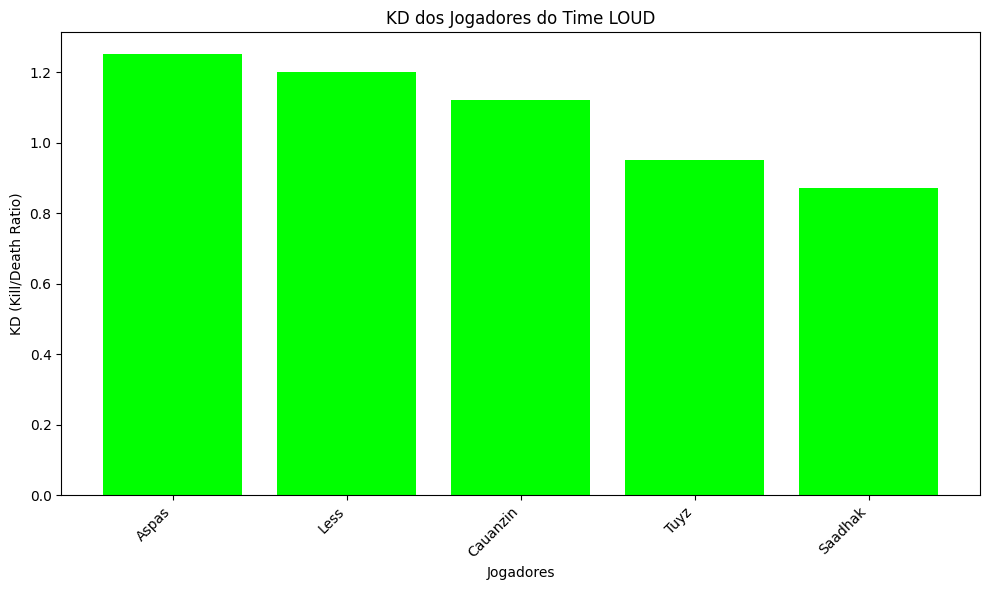

In [48]:
loud_ds = dataset[dataset['Team'] == "LOUD"]

# Ordenar os jogadores por KD em ordem decrescente
loud_ds = loud_ds.sort_values(by='KD', ascending=False)

# Configurar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(loud_ds['Player'], loud_ds['KD'], color='lime')
plt.xlabel('Jogadores')
plt.ylabel('KD (Kill/Death Ratio)')
plt.title(f'KD dos Jogadores do Time {"LOUD"}')
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos do eixo x para facilitar a leitura

plt.tight_layout()
plt.show()

## Além da análise do Kill/Death Ratio, é importante ressaltar o impacto dos suportes da LOUD:
### Tuyz(Arthur Vieira): Com a função de controlador do time, Tuyz possui um grande impacto em assistências, além de possuir muitas habilidades de um suporte, as mortes dentro da smoke são contadas como assistência para o mesmo, mostrando que, mesmo começando a exercer a função à pouco tempo, vem a exercendo com maestria;
### Cauanzin(Cauan Pereira): Sendo o iniciador do time, Cauan possui um "kit" completo de suporte, sendo capaz de escanear seus adversários com as suas habilidades e causando impacto para o jogo e ganhando assistências para as suas estatísticas;
### Saadhak(Matias Delipetro): Por fim, o In Game Leader, Saadhak, causa um grande impacto no jogo assim como os outros dois. Além de ser o capitão do time, Saadhak exerce a posição de Flex Player, função que pode trazer bonecos de todas as outras funções e sendo considerada, literalmente, a posição de suporte. A escolha dos agentes do Matias dependem do impacto e funções que a LOUD quer trazer para o mapa que será jogado, então seus bonecos podem possuir habilidades variadas, como flashbangs, atordoamentos, smokes e granadas, facilitando o ganho de assistências e deixando os objetivos da LOUD mais viáveis.


In [49]:
loud_ds = dataset[dataset['Team'] == 'LOUD']

# Selecionar apenas as colunas desejadas, 'Player', 'Agents', 'KDA', 'Assists', 'Maps', 'A/Map'
colunas_selecionadas = ['Player', 'Agents', 'KDA', 'A', 'Maps', 'A/Map']
loud_ds = loud_ds[colunas_selecionadas]
loud_ds = loud_ds.sort_values(by='KDA', ascending=False)

# Exibir o DataFrame resultante
print(loud_ds)

      Player                        Agents   KDA    A  Maps  A/Map
64      Tuyz   ['Omen', 'Astra', 'Harbor']  1.73  247    24   10.2
19  Cauanzin      ['Skye', 'Fade', 'Sova']  1.71  207    24    8.6
50   Saadhak  ['Breach', 'Viper', 'KAY/O']  1.58  252    24   10.5
11      Less          ['Killjoy', 'Viper']  1.50  100    24    4.1
3      Aspas              ['Raze', 'Jett']  1.48   82    24    3.4


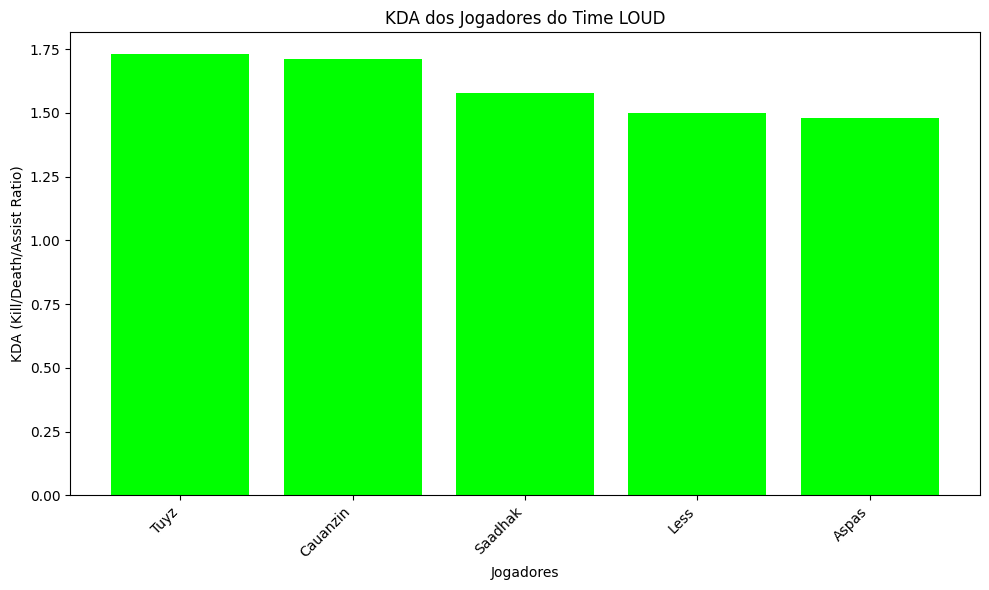

In [50]:
loud_ds = dataset[dataset['Team'] == "LOUD"]

# Ordenar os jogadores por KDA em ordem decrescente
loud_ds = loud_ds.sort_values(by='KDA', ascending=False)

# Configurar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(loud_ds['Player'], loud_ds['KDA'], color='lime')
plt.xlabel('Jogadores')
plt.ylabel('KDA (Kill/Death/Assist Ratio)')
plt.title(f'KDA dos Jogadores do Time {"LOUD"}')
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos do eixo x para facilitar a leitura

plt.tight_layout()
plt.show()

## O ACS(Average Combat Score) são dados importantes também, já que é um valor que mostra o quanto o jogador participou da partida, ou seja, é uma avaliação geral do desempenho do jogador. Nesse caso, foi feito uma média do ACS dos jogadores por mapa. Sendo assim, mostra o quão impactante eles foram nos mapas que jogaram 

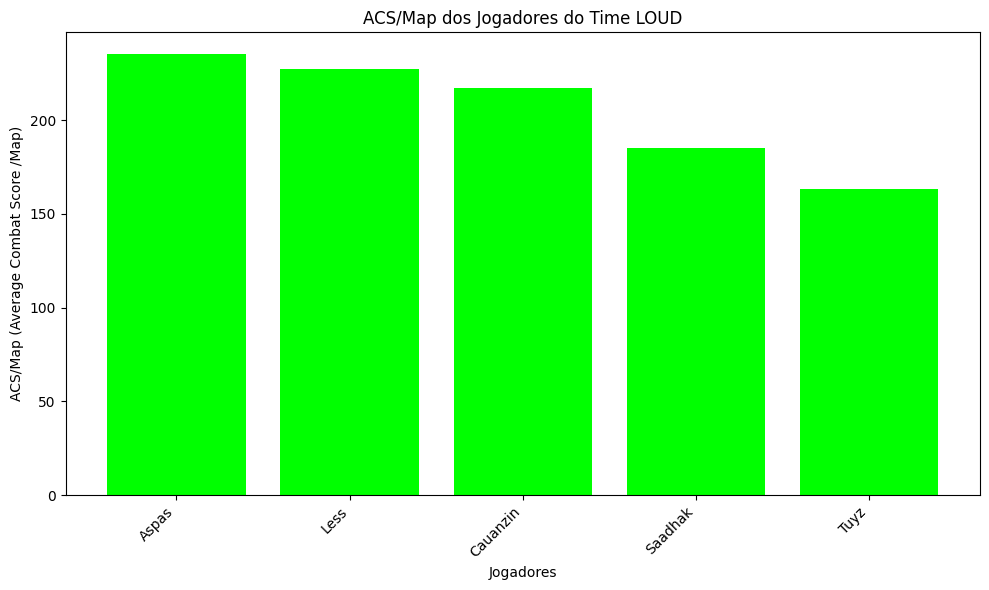

In [51]:
loud_ds = dataset[dataset['Team'] == "LOUD"]

# Ordenar os jogadores por ACS/Map em ordem decrescente
loud_ds = loud_ds.sort_values(by='ACS/Map', ascending=False)

# Configurar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(loud_ds['Player'], loud_ds['ACS/Map'], color='lime')
plt.xlabel('Jogadores')
plt.ylabel('ACS/Map (Average Combat Score /Map)')
plt.title(f'ACS/Map dos Jogadores do Time {"LOUD"}')
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos do eixo x para facilitar a leitura

plt.tight_layout()
plt.show()

# Por fim, analisarei os dois times finalistas, com o mesmo estudo feito com o time brasileiro. Os times finalistas foram a Evil Geniuses, o time norte-americano que foi campeão e o time da Paper Rex, que é da Singapura.

## O time da Evil Geniuses já vinha mostrando seu alto nível no Champions Tour, e mesmo não jogando o LOCK//IN no início do ano, se mostraram preparados para jogar contra qualquer time, aqui estão as estatísticas de todos os jogadores da EG:

In [52]:
eg_ds = dataset[dataset['Team'] == 'Evil Geniuses']
eg_ds.sort_values('KD', ascending = False)

,Player,Player Name,Country,Team,Agents,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map
2,Demon1,Max Mazanov,United States,Evil Geniuses,"['Jett', 'Astra', 'Chamber']",21,421,302,80,1.39,1.65,246,20.0,14.3,3.8
37,C0M,Corbin Lee,United States,Evil Geniuses,"['Sova', 'Viper']",21,330,294,144,1.12,1.61,195,15.7,14.0,6.8
9,Jawgemo,Alexander Mor,Cambodia,Evil Geniuses,"['Raze', 'Omen', 'Astra']",21,362,325,154,1.11,1.58,228,17.2,15.4,7.3
38,Ethan,Ethan Arnold,United States,Evil Geniuses,"['Skye', 'KAY/O', 'Yoru']",21,303,303,265,1.00,1.87,193,14.4,14.4,12.6
47,Boostio,Kelden Pupello,United States,Evil Geniuses,"['Killjoy', 'Brimstone', 'Chamber']",21,291,335,119,0.86,1.22,187,13.8,15.9,5.6


## O time da EG possui um estilo de jogo único e um time bem completo, no qual seus jogadores exercem várias funções e jogam com agentes que nem sempre é o "conforto" para aqueles que jogam na mesma função. Facilitando assim a montagem das composições para os mapas, e surpreendendo os seus adversários com suas táticas.

### Como já foi comentado, o Demon1 foi considerado o melhor jogador do campeonato, com uma média de 20 kills por mapa e o melhor K/D do campeonato considerando a quantidade de mapas que ele jogou. Seus companheiros também desempenharam muito bem e consequentemente fizeram um ótimo suporte para o seu duelista e MVP das finais.

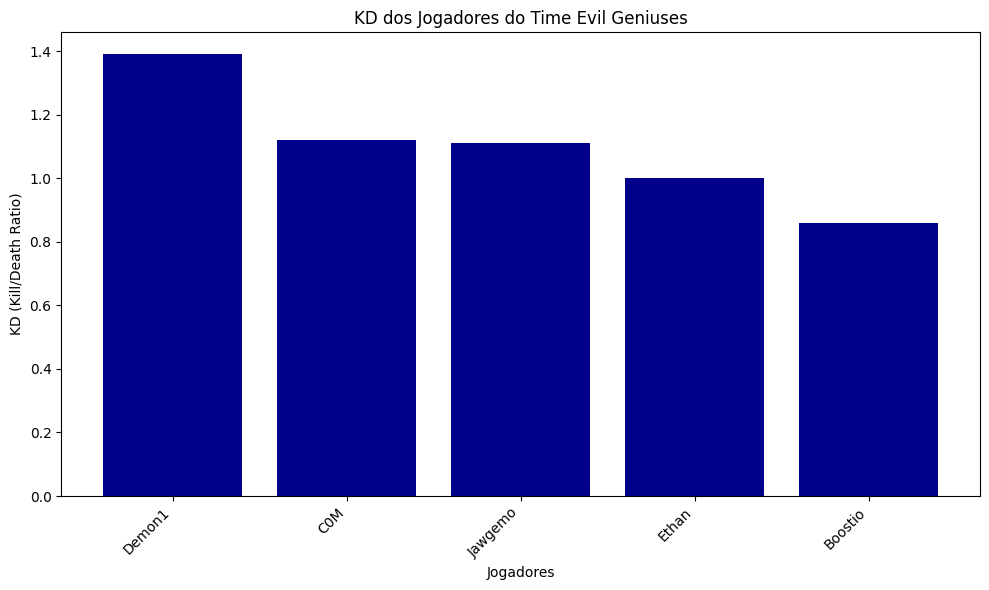

In [53]:
eg_ds = dataset[dataset['Team'] == "Evil Geniuses"]

# Ordenar os jogadores por KD em ordem decrescente
eg_ds = eg_ds.sort_values(by='KD', ascending=False)

# Configurar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(eg_ds['Player'], eg_ds['KD'], color='darkblue')
plt.xlabel('Jogadores')
plt.ylabel('KD (Kill/Death Ratio)')
plt.title(f'KD dos Jogadores do Time {"Evil Geniuses"}')
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos do eixo x para facilitar a leitura

plt.tight_layout()
plt.show()

## Assim como visto no time da LOUD, os suportes são de grande importância para o impacto do duelista(Demon1) e do sentinela(Boostio), no caso da Evil Geniuses, não é tão diferente. Mas diferente do time da Loud, a média de assistências por mapa do time da EG é um pouco menor, e pelo Demon1 ter tido um K/D Ratio tão alto, seu K/D/A ainda ficou alto.

### Ethan(Ethan Arnold): Ethan é o flex player da Evil Geniuses e exerce com maestria essa função, sendo o melhor suporte do campeonato e o Saadhak vindo logo em seguida. Ethan além de ter um K/D razoavelmente bom(1.0), traz um grande impacto com suas habilidades, sendo o player com mais assistências no campeonato e tendo a melhor média de assistências por mapa.
### jawgemo(Alexander Mor): Como já foi comentado, o time da EG é bem flexível, fica claro isso quando vemos que um dos agentes que o jawgemo mais joga é a Raze, um dos duelistas do jogo. Além da Raze, jawgemo divide a função de controlador com o Boostio, jogando de Astra e Omen, que trazem muitas habilidades de suporte, e assim como o Tuyz ele pega muitas dessas assistências em smokes.
### C0M(Corbin Lee): Sendo o iniciador e mais um dos players flexíveis da EG, Corbin faz duas funções bem opostas, jogando de Sova nos mapas que o time precisa escanear e limpar mais áreas, além das possibilidades de limpeza do mapa com as habilidades do Ethan. Já nos outros mapas, ele traz a Viper, personagem que controla muito bem o mapa e faz, na maioria das vezes, a função de "Lurker", um papel de grande impacto no jogo, já que ele tem a função de controlar um lado do mapa sozinho e possibilitar "fakes"(fingir entrar em um bombsite enquanto seu time entra em outro), ou até mesmo infiltrações.

In [54]:
# Encontrando o jogador com mais assistências e com a melhor média de assistências por mapa
jogador_com_mais_assistencias = dataset[dataset['A'] == dataset['A'].max()]
jogador_com_mais_ass_map = dataset[dataset['A/Map'] == dataset['A/Map'].max()]

# Exibe o jogador com mais assistências e o jogador com mais assistências por mapa
print(jogador_com_mais_assistencias[['Player', 'A']])

print(jogador_com_mais_ass_map[['Player', 'A/Map']])

   Player    A
38  Ethan  265
   Player  A/Map
38  Ethan   12.6


In [55]:
dataset = dataset.sort_values(by='A', ascending=False)

# Obtendo os jogadores com o maior e o segundo maior número de assistências
primeiro_lugar = dataset.iloc[0]
segundo_lugar = dataset.iloc[1]

print("Jogador com o maior número de assistências:")
print(primeiro_lugar[['Player', 'A']])

print("\nJogador com o segundo maior número de assistências:")
print(segundo_lugar[['Player', 'A']])

Jogador com o maior número de assistências:
Player    Ethan
A           265
Name: 38, dtype: object

Jogador com o segundo maior número de assistências:
Player    Saadhak
A             252
Name: 50, dtype: object


In [56]:
eg_ds = dataset[dataset['Team'] == 'Evil Geniuses']

# Selecionar apenas as colunas desejadas, 'Player', 'Agents', 'KDA', 'Assists', 'Maps', 'A/Map'
colunas_selecionadas = ['Player', 'Agents', 'KDA', 'A', 'Maps', 'A/Map']
eg_ds = eg_ds[colunas_selecionadas]
eg_ds = eg_ds.sort_values(by='KDA', ascending=False)

# Exibir o DataFrame resultante
print(eg_ds)

     Player                               Agents   KDA    A  Maps  A/Map
38    Ethan            ['Skye', 'KAY/O', 'Yoru']  1.87  265    21   12.6
2    Demon1         ['Jett', 'Astra', 'Chamber']  1.65   80    21    3.8
37      C0M                    ['Sova', 'Viper']  1.61  144    21    6.8
9   Jawgemo            ['Raze', 'Omen', 'Astra']  1.58  154    21    7.3
47  Boostio  ['Killjoy', 'Brimstone', 'Chamber']  1.22  119    21    5.6


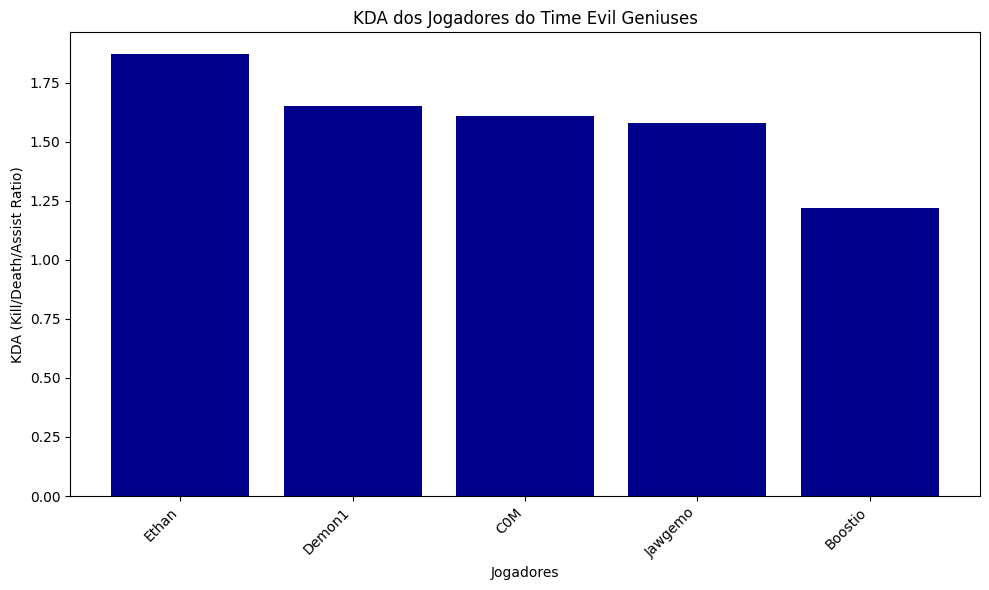

In [57]:
eg_ds = dataset[dataset['Team'] == "Evil Geniuses"]

# Ordenar os jogadores por KDA em ordem decrescente
eg_ds = eg_ds.sort_values(by='KDA', ascending=False)

# Configurar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(eg_ds['Player'], eg_ds['KDA'], color='darkblue')
plt.xlabel('Jogadores')
plt.ylabel('KDA (Kill/Death/Assist Ratio)')
plt.title(f'KDA dos Jogadores do Time {"Evil Geniuses"}')
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos do eixo x para facilitar a leitura

plt.tight_layout()
plt.show()

## Assim como mostrado na parte de análise dos dados da Loud, o ACS é o quanto o jogador impactou no jogo. Percebe-se que o Demon1 é realmente digno do MVP(Most Valuable Player), já que foi um jogador fora da curva, com um ACS muito acima da média, e comparando à quantidade de mapas que ele jogou, fica ainda mais absurda essa quantidade de pontos.

In [58]:
media_acs_map = dataset['ACS/Map'].mean()

print(f"A média da coluna 'ACS/Map' é: {media_acs_map}")

A média da coluna 'ACS/Map' é: 191.8875


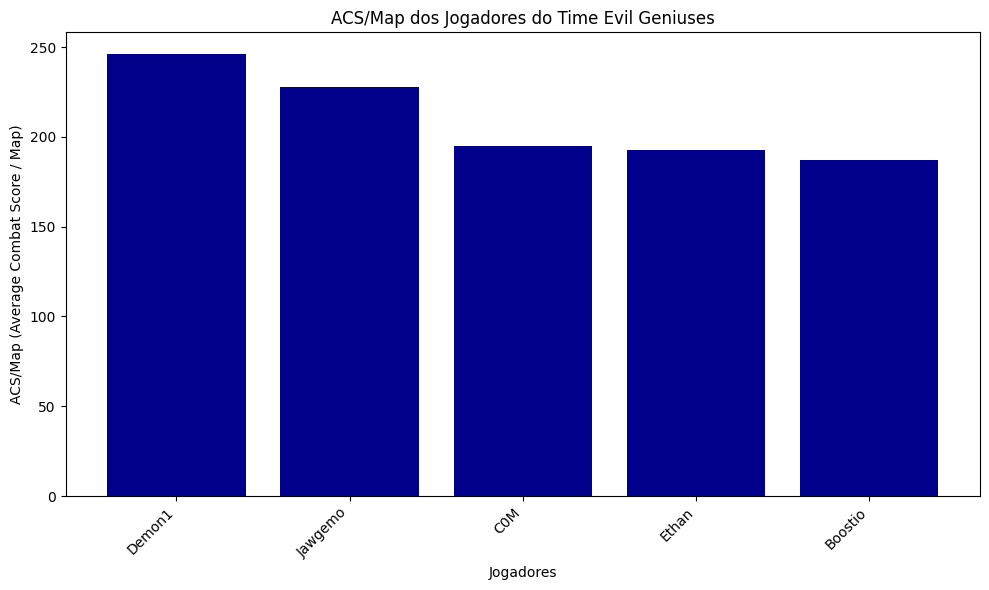

In [59]:
eg_ds = dataset[dataset['Team'] == "Evil Geniuses"]

# Ordenar os jogadores por ACS/Map em ordem decrescente
eg_ds = eg_ds.sort_values(by='ACS/Map', ascending=False)

# Configurar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(eg_ds['Player'], eg_ds['ACS/Map'], color='darkblue')
plt.xlabel('Jogadores')
plt.ylabel('ACS/Map (Average Combat Score / Map)')
plt.title(f'ACS/Map dos Jogadores do Time {"Evil Geniuses"}')
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos do eixo x para facilitar a leitura

plt.tight_layout()
plt.show()

## Já o time vice campeão, a Paper Rex, também traz um time bem completo e com composições bem diferentes do comum

### É perceptível quando vemos os dados do time que é um time bem equilibrado, e assim como o time da EG traz jogadores que jogam em várias funções e com excelência. Jinggg, assim como o Demon1 e o Aspas, foi um dos melhores jogadores do campeonato, e sendo também um duelista, o que mostra o quão impactante é essa classe e que se seu time conta com os melhores duelistas do mundo, também terão os melhores resultados.

In [60]:
prx_ds = dataset[dataset['Team'] == 'Paper Rex']
prx_ds.sort_values('KD', ascending = False)

,Player,Player Name,Country,Team,Agents,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map
23,Something,Ilya Petrov,Russia,Paper Rex,"['Jett', 'Reyna', 'Breach']",16,269,245,73,1.09,1.39,210,16.8,15.3,4.5
41,D4v41,Khalish Rusyaidee,Malaysia,Paper Rex,"['Skye', 'Viper', 'Killjoy']",16,243,227,153,1.07,1.74,192,15.1,14.1,9.5
4,Jinggg,Wang Jing Jie,Singapore,Paper Rex,"['Raze', 'Phoenix']",16,285,279,92,1.02,1.35,234,17.8,17.4,5.7
29,F0rsakeN,Jason Susanto,Indonesia,Paper Rex,"['Killjoy', 'Harbor', 'Skye']",16,256,255,121,1.00,1.47,205,16.0,15.9,7.5
63,Mindfreak,Aaron Leonhart,Indonesia,Paper Rex,"['Astra', 'Viper', 'Brimstone']",16,214,220,132,0.97,1.57,164,13.3,13.7,8.2


## Vendo de primeira mão os dados, acreditamos que o time da Paper Rex tá bem abaixo dos outros dois que vimos, mas esse time ganhou da Loud e da Evil Geniuses neste campeonato, e como eles fizeram isso?

### O time da Loud e da EG jogaram uma quantidade maior de mapas, 24 e 21 mapas, respectivamente, tendo a chance de aumentar os seus números. Mas o mérito é todo da Paper Rex por terem jogado menos mapas, já que ganharam todos os jogos na chave superior do campeonato, chegando a grande final mais cedo. Vendo algumas entrevistas e comentários em livestream's de jogadores, como a do próprio Erick(Aspas), o jogador comenta que a Paper Rex é um time muito imprevísivel, já que traz agentes que não são tão comuns no competitivo. Vamos avaliar os dados desse time:

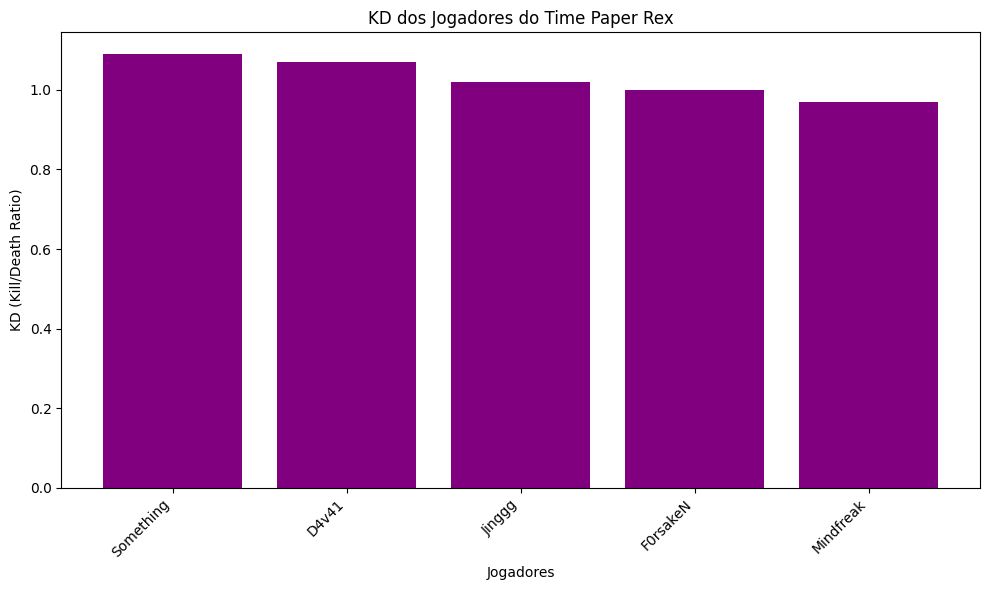

In [61]:
prx_ds = dataset[dataset['Team'] == "Paper Rex"]

# Ordenar os jogadores por KD em ordem decrescente
prx_ds = prx_ds.sort_values(by='KD', ascending=False)

# Configurar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(prx_ds['Player'], prx_ds['KD'], color='purple')
plt.xlabel('Jogadores')
plt.ylabel('KD (Kill/Death Ratio)')
plt.title(f'KD dos Jogadores do Time {"Paper Rex"}')
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos do eixo x para facilitar a leitura

plt.tight_layout()
plt.show()

### Como já havia comentado, o time da Paper Rex é um time bem equilibrado em números, onde todos os seus jogadores trazem um grande impacto ao jogo.

## Mesmo trazendo o KDA dos jogadores, ainda vai haver esse equilíbrio, mas podemos perceber que assim como nos outros times, os que possuem mais assistências são os seus suportes:

### d4v41(Khalish Rusyaidee): Khalish é o iniciador do time, jogando na maioria dos jogos de Skye, agente que a Paper Rex gosta muito de utilizar, diferente de alguns times que trazem mais o Sova ou Fade, que são personagens que escaneiam os adversários. A Paper Rex gosta de trazer a Skye por ter um kit completo, boneco que pode escanear e curar seus aliados, além de trazer uma ultimate que rastreia 3 jogadores no mapa.
### mindfreak(Aaron Leonhart): O mindfreak, assim como o Tuyz, é o controlador fixo do time e não é preciso dividir essa função com outros da sua equipe, apenas quando é necessário o uso de mais de um controlador. Foi o segundo maior jogador do time com assistências, o que demonstra que exerce bem a sua função, além de utilizar na maioria das vezes a Astra, considerada por muitos o controlador mais difícil do jogo.
### f0rsaken(Jason Susanto): Jason provavelmente é o jogador que trouxe mais agentes no seu kit, jogando até com Yoru, que é um duelista que normalmente não vemos no competitivo. Por ser um time que não joga muitos mapas com um sentinela fixo, f0rsaken joga normalmente como segundo controlador e as vezes com a Killjoy, mostrando que pode ser um jogador eficiente com todas as classes que temos no jogo.

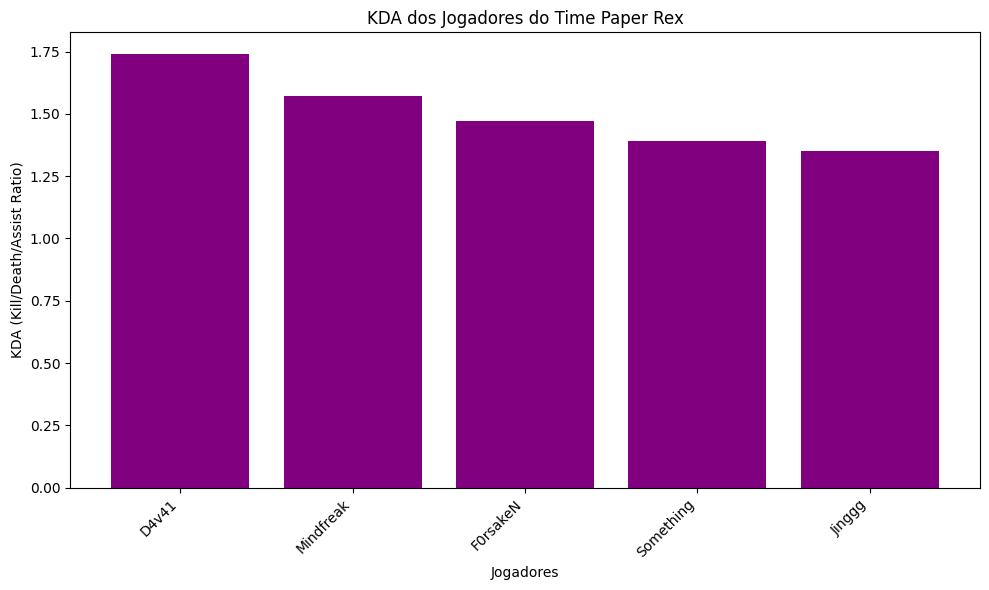

In [62]:
prx_ds = dataset[dataset['Team'] == "Paper Rex"]

# Ordenar os jogadores por KDA em ordem decrescente
prx_ds = prx_ds.sort_values(by='KDA', ascending=False)

# Configurar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(prx_ds['Player'], prx_ds['KDA'], color='purple')
plt.xlabel('Jogadores')
plt.ylabel('KDA (Kill/Death/Assist Ratio)')
plt.title(f'KDA dos Jogadores do Time {"Paper Rex"}')
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos do eixo x para facilitar a leitura

plt.tight_layout()
plt.show()

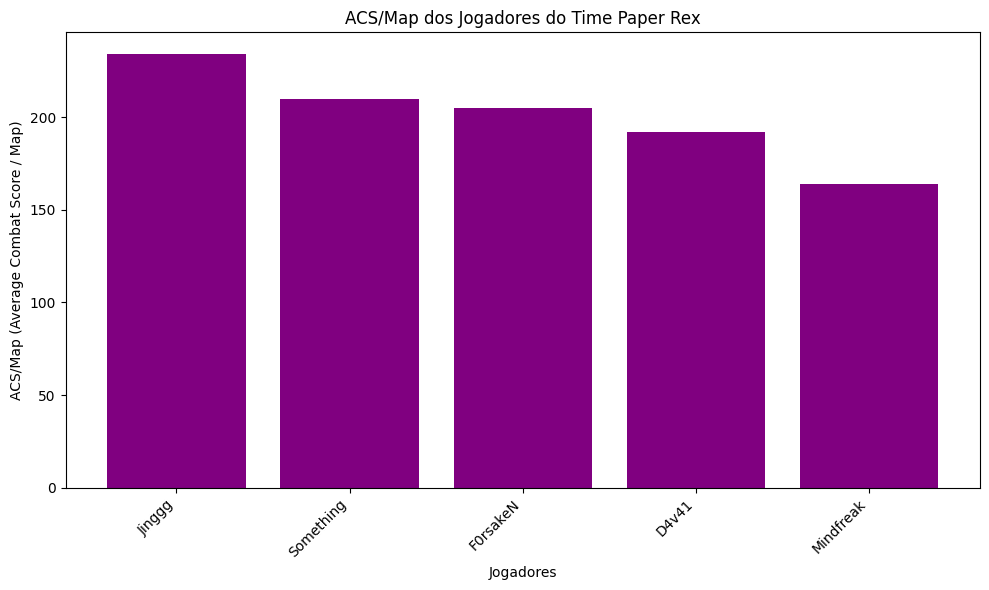

In [63]:
prx_ds = dataset[dataset['Team'] == "Paper Rex"]

# Ordenar os jogadores por ACS/Map em ordem decrescente
prx_ds = prx_ds.sort_values(by='ACS/Map', ascending=False)

# Configurar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(prx_ds['Player'], prx_ds['ACS/Map'], color='purple')
plt.xlabel('Jogadores')
plt.ylabel('ACS/Map (Average Combat Score / Map)')
plt.title(f'ACS/Map dos Jogadores do Time {"Paper Rex"}')
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos do eixo x para facilitar a leitura

plt.tight_layout()
plt.show()

### Aqui podemos perceber o porque o Jinggg foi considerado um dos melhores do campeonato, mesmo tendo um K/D razoável, sua média de combate foi muito alta, também acima da média dos outros jogadores do campeonato, sendo um duelista de grande impacto, o que fez levar seu time, juntamente com seus companheiros, para a grande final.

# Bônus: Listarei agora os melhores e piores jogadores por KD, KDA e ACS/Map.

## Melhores jogadores do campeonato por K/D:

In [64]:
dataset.sort_values('KD', ascending = False)

,Player,Player Name,Country,Team,Agents,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map
2,Demon1,Max Mazanov,United States,Evil Geniuses,"['Jett', 'Astra', 'Chamber']",21,421,302,80,1.39,1.65,246,20.0,14.3,3.8
6,Alfajer,Emir Ali Beder,Turkey,Fnatic,"['Killjoy', 'Cypher', 'Chamber']",14,233,168,36,1.38,1.60,232,16.6,12.0,2.5
28,Leo,Leo Jannesson,Sweden,Fnatic,"['Sova', 'Skye', 'Fade']",14,201,147,119,1.36,2.17,206,14.3,10.5,8.5
7,AAAAY,Zhang Yang,China,FunPlus Phoenix,"['Skye', 'Gekko']",4,76,57,16,1.33,1.61,231,19.0,14.2,4.0
3,Aspas,Erick Santos,Brazil,LOUD,"['Raze', 'Jett']",24,446,355,82,1.25,1.48,235,18.5,14.7,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,TENNN,Tenta Asai,Japan,ZETA DIVISION,['Raze'],4,44,66,9,0.66,0.80,146,11.0,16.5,2.2
78,SugarZ3ro,Shota Watanabe,Japan,ZETA DIVISION,"['Brimstone', 'Astra']",4,38,58,24,0.65,1.06,115,9.5,14.5,6.0
74,Melser,Marco Eliot Machuca Amaro,Chile,KRÜ Esports,"['Harbor', 'Astra', 'Omen']",4,44,69,24,0.63,0.98,145,11.0,17.2,6.0
69,BerLIN,Zhang Bolin,Taiwan,FunPlus Phoenix,"['Omen', 'Harbor', 'Raze']",4,40,67,29,0.59,1.02,155,10.0,16.7,7.2


## Piores jogadores do campeonato por K/D: 

In [65]:
dataset.sort_values('KD', ascending = True)

,Player,Player Name,Country,Team,Agents,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map
79,Crow,Maruoka Tomoaki,Japan,ZETA DIVISION,"['Skye', 'Breach']",4,29,61,23,0.47,0.85,106,7.2,15.2,5.7
69,BerLIN,Zhang Bolin,Taiwan,FunPlus Phoenix,"['Omen', 'Harbor', 'Raze']",4,40,67,29,0.59,1.02,155,10.0,16.7,7.2
74,Melser,Marco Eliot Machuca Amaro,Chile,KRÜ Esports,"['Harbor', 'Astra', 'Omen']",4,44,69,24,0.63,0.98,145,11.0,17.2,6.0
78,SugarZ3ro,Shota Watanabe,Japan,ZETA DIVISION,"['Brimstone', 'Astra']",4,38,58,24,0.65,1.06,115,9.5,14.5,6.0
73,TENNN,Tenta Asai,Japan,ZETA DIVISION,['Raze'],4,44,66,9,0.66,0.80,146,11.0,16.5,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,Aspas,Erick Santos,Brazil,LOUD,"['Raze', 'Jett']",24,446,355,82,1.25,1.48,235,18.5,14.7,3.4
7,AAAAY,Zhang Yang,China,FunPlus Phoenix,"['Skye', 'Gekko']",4,76,57,16,1.33,1.61,231,19.0,14.2,4.0
28,Leo,Leo Jannesson,Sweden,Fnatic,"['Sova', 'Skye', 'Fade']",14,201,147,119,1.36,2.17,206,14.3,10.5,8.5
6,Alfajer,Emir Ali Beder,Turkey,Fnatic,"['Killjoy', 'Cypher', 'Chamber']",14,233,168,36,1.38,1.60,232,16.6,12.0,2.5


## Melhores jogadores por K/D/A:

In [66]:
dataset.sort_values('KDA', ascending = False)

,Player,Player Name,Country,Team,Agents,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map
28,Leo,Leo Jannesson,Sweden,Fnatic,"['Sova', 'Skye', 'Fade']",14,201,147,119,1.36,2.17,206,14.3,10.5,8.5
38,Ethan,Ethan Arnold,United States,Evil Geniuses,"['Skye', 'KAY/O', 'Yoru']",21,303,303,265,1.00,1.87,193,14.4,14.4,12.6
41,D4v41,Khalish Rusyaidee,Malaysia,Paper Rex,"['Skye', 'Viper', 'Killjoy']",16,243,227,153,1.07,1.74,192,15.1,14.1,9.5
64,Tuyz,Arthur Andrade,Brazil,LOUD,"['Omen', 'Astra', 'Harbor']",24,304,317,247,0.95,1.73,163,12.6,13.2,10.2
44,MaKo,Kim Myeong-gwan,South Korea,DRX,"['Omen', 'Brimstone']",13,183,189,145,0.96,1.73,190,14.0,14.5,11.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Melser,Marco Eliot Machuca Amaro,Chile,KRÜ Esports,"['Harbor', 'Astra', 'Omen']",4,44,69,24,0.63,0.98,145,11.0,17.2,6.0
70,Laz,Ushida Koji,Japan,ZETA DIVISION,"['Chamber', 'Viper']",4,48,60,11,0.80,0.98,154,12.0,15.0,2.7
67,Jamppi,Elias Olkkonen,Finland,Team Liquid,"['Jett', 'Chamber', 'Breach']",4,56,66,6,0.84,0.93,162,14.0,16.5,1.5
79,Crow,Maruoka Tomoaki,Japan,ZETA DIVISION,"['Skye', 'Breach']",4,29,61,23,0.47,0.85,106,7.2,15.2,5.7


## Piores jogadores por K/D/A:

In [67]:
dataset.sort_values('KD', ascending = True)

,Player,Player Name,Country,Team,Agents,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map
79,Crow,Maruoka Tomoaki,Japan,ZETA DIVISION,"['Skye', 'Breach']",4,29,61,23,0.47,0.85,106,7.2,15.2,5.7
69,BerLIN,Zhang Bolin,Taiwan,FunPlus Phoenix,"['Omen', 'Harbor', 'Raze']",4,40,67,29,0.59,1.02,155,10.0,16.7,7.2
74,Melser,Marco Eliot Machuca Amaro,Chile,KRÜ Esports,"['Harbor', 'Astra', 'Omen']",4,44,69,24,0.63,0.98,145,11.0,17.2,6.0
78,SugarZ3ro,Shota Watanabe,Japan,ZETA DIVISION,"['Brimstone', 'Astra']",4,38,58,24,0.65,1.06,115,9.5,14.5,6.0
73,TENNN,Tenta Asai,Japan,ZETA DIVISION,['Raze'],4,44,66,9,0.66,0.80,146,11.0,16.5,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,Aspas,Erick Santos,Brazil,LOUD,"['Raze', 'Jett']",24,446,355,82,1.25,1.48,235,18.5,14.7,3.4
7,AAAAY,Zhang Yang,China,FunPlus Phoenix,"['Skye', 'Gekko']",4,76,57,16,1.33,1.61,231,19.0,14.2,4.0
28,Leo,Leo Jannesson,Sweden,Fnatic,"['Sova', 'Skye', 'Fade']",14,201,147,119,1.36,2.17,206,14.3,10.5,8.5
6,Alfajer,Emir Ali Beder,Turkey,Fnatic,"['Killjoy', 'Cypher', 'Chamber']",14,233,168,36,1.38,1.60,232,16.6,12.0,2.5


## Melhores jogadores por ACS:

In [68]:
dataset.sort_values('ACS/Map', ascending = False)

,Player,Player Name,Country,Team,Agents,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map
0,Keznit,Angelo Mori,Chile,KRÜ Esports,"['Raze', 'Jett']",4,79,70,21,1.12,1.42,266,19.7,17.5,5.2
1,Whz,Wang Haozhe,China,Bilibili Gaming,"['Raze', 'Jett']",11,212,181,41,1.17,1.39,254,19.2,16.4,3.7
2,Demon1,Max Mazanov,United States,Evil Geniuses,"['Jett', 'Astra', 'Chamber']",21,421,302,80,1.39,1.65,246,20.0,14.3,3.8
3,Aspas,Erick Santos,Brazil,LOUD,"['Raze', 'Jett']",24,446,355,82,1.25,1.48,235,18.5,14.7,3.4
4,Jinggg,Wang Jing Jie,Singapore,Paper Rex,"['Raze', 'Phoenix']",16,285,279,92,1.02,1.35,234,17.8,17.4,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Rin,Li Le Wei,China,Bilibili Gaming,"['Omen', 'Killjoy', 'Brimstone']",11,122,167,81,0.73,1.21,144,11.0,15.1,7.3
76,TZH,Tang Zehao,China,FunPlus Phoenix,"['Astra', 'Viper', 'Harbor']",4,42,59,23,0.71,1.10,137,10.5,14.7,5.7
77,Soulcas,Dom Sulcas,United Kingdom,Team Liquid,"['Skye', 'Astra']",4,44,58,25,0.75,1.18,134,11.0,14.5,6.2
78,SugarZ3ro,Shota Watanabe,Japan,ZETA DIVISION,"['Brimstone', 'Astra']",4,38,58,24,0.65,1.06,115,9.5,14.5,6.0


## Piores jogadores por ACS:

In [37]:
dataset.sort_values('KD', ascending = True)

,Player,Player Name,Country,Team,Agents,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map
79,Crow,Maruoka Tomoaki,Japan,ZETA DIVISION,"['Skye', 'Breach']",4,29,61,23,0.47,0.85,106,7.2,15.2,5.7
69,BerLIN,Zhang Bolin,Taiwan,FunPlus Phoenix,"['Omen', 'Harbor', 'Raze']",4,40,67,29,0.59,1.02,155,10.0,16.7,7.2
74,Melser,Marco Eliot Machuca Amaro,Chile,KRÜ Esports,"['Harbor', 'Astra', 'Omen']",4,44,69,24,0.63,0.98,145,11.0,17.2,6.0
78,SugarZ3ro,Shota Watanabe,Japan,ZETA DIVISION,"['Brimstone', 'Astra']",4,38,58,24,0.65,1.06,115,9.5,14.5,6.0
73,TENNN,Tenta Asai,Japan,ZETA DIVISION,['Raze'],4,44,66,9,0.66,0.80,146,11.0,16.5,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,Aspas,Erick Santos,Brazil,LOUD,"['Raze', 'Jett']",24,446,355,82,1.25,1.48,235,18.5,14.7,3.4
7,AAAAY,Zhang Yang,China,FunPlus Phoenix,"['Skye', 'Gekko']",4,76,57,16,1.33,1.61,231,19.0,14.2,4.0
28,Leo,Leo Jannesson,Sweden,Fnatic,"['Sova', 'Skye', 'Fade']",14,201,147,119,1.36,2.17,206,14.3,10.5,8.5
6,Alfajer,Emir Ali Beder,Turkey,Fnatic,"['Killjoy', 'Cypher', 'Chamber']",14,233,168,36,1.38,1.60,232,16.6,12.0,2.5
